In [1]:
from google.colab.patches import cv2_imshow

In [2]:
# import required modules
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image
import cv2

In [3]:
modelo = tf.keras.models.load_model('/content/drive/MyDrive/universidad_de_chile/generator.h5')

In [4]:
modelo

In [5]:
imagen = '/content/drive/MyDrive/universidad_de_chile/img_dataset/1000.jpg'

In [6]:
def load(image_file):
  """
    Debe separar las imágenes  real de las imágenes de la etiqueta de dibujo, todas las cuales tendrán un tamaño de 256 x 256 .

    Defina una función que cargue archivos de imagen y genere dos tensores de imagen:
  """

  # Read and decode an image file to a uint8 tensor
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)

  # Split each image tensor into two tensors:
  # - one with a real building facade image
  # - one with an architecture label image 
  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # Convert both images to float32 tensors
  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  return input_image, real_image

In [7]:
inp, real = load(imagen)

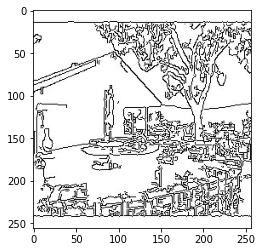

In [8]:
plt.figure()
plt.imshow(inp/255.)

In [9]:
path = '/content/drive/MyDrive/universidad_de_chile/checkpoints'

In [10]:
checkpoint = tf.train.Checkpoint(modelo)


In [11]:
checkpoint.restore(tf.train.latest_checkpoint(path))

In [12]:
pesos = '/content/drive/MyDrive/universidad_de_chile/generator_weights.h5'
modelo.load_weights(pesos)

In [13]:
def generate_images(model, input):
  prediction = model(input[tf.newaxis, ...], training=True)
  plt.figure(figsize=(5, 5))

  plt.title('Prediction')
  # Getting the pixel values in the [0, 1] range to plot.
  plt.imshow(prediction[0, ...] * 0.5 + 0.5)
  plt.axis('off')
  plt.show()

In [14]:
# The facade training set consist of 400 images
BUFFER_SIZE = 400
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256

In [15]:
def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width],
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width],
                               method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image

In [16]:
# Normalizing the images to [-1, 1]
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [17]:
def load_image(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [18]:
dib, real=load_image(imagen)

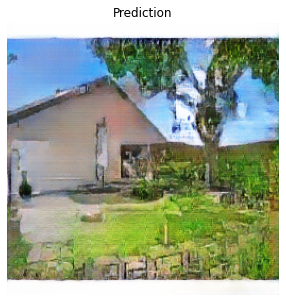

In [19]:
generate_images(modelo, dib)

In [23]:
modelo.save('modelo_f.h5')

In [20]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 83 kB 1.4 MB/s 
     |████████████████████████████████| 185 kB 18.8 MB/s 
     |████████████████████████████████| 16.0 MB 99 kB/s 
     |████████████████████████████████| 578.0 MB 10 kB/s 
     |████████████████████████████████| 40 kB 5.8 MB/s 
     |████████████████████████████████| 237 kB 35.3 MB/s 
     |████████████████████████████████| 145 kB 48.8 MB/s 
     |████████████████████████████████| 51 kB 5.2 MB/s 
     |████████████████████████████████| 1.7 MB 57.5 MB/s 
     |████████████████████████████████| 438 kB 47.6 MB/s 
     |████████████████████████████████| 5.9 MB 32.6 MB/s 
     |████████████████████████████████| 85 kB 3.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Atte

In [21]:
!mkdir carpeta_salida

In [24]:
!tensorflowjs_converter --input_format keras modelo_f.h5 carpeta_salida

2022-11-07 18:30:29.698646: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-07 18:30:31.902711: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-07 18:30:31.903475: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/lib/python3.7/dist-packages/cv2/../../lib64:/usr/local/nvidia/lib:/usr/local/nvidia/lib64
2022-11-07 18:30:31.903516: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

In [25]:
!ls carpeta_salida

group1-shard10of52.bin	group1-shard27of52.bin	group1-shard43of52.bin
group1-shard11of52.bin	group1-shard28of52.bin	group1-shard44of52.bin
group1-shard12of52.bin	group1-shard29of52.bin	group1-shard45of52.bin
group1-shard13of52.bin	group1-shard2of52.bin	group1-shard46of52.bin
group1-shard14of52.bin	group1-shard30of52.bin	group1-shard47of52.bin
group1-shard15of52.bin	group1-shard31of52.bin	group1-shard48of52.bin
group1-shard16of52.bin	group1-shard32of52.bin	group1-shard49of52.bin
group1-shard17of52.bin	group1-shard33of52.bin	group1-shard4of52.bin
group1-shard18of52.bin	group1-shard34of52.bin	group1-shard50of52.bin
group1-shard19of52.bin	group1-shard35of52.bin	group1-shard51of52.bin
group1-shard1of52.bin	group1-shard36of52.bin	group1-shard52of52.bin
group1-shard20of52.bin	group1-shard37of52.bin	group1-shard5of52.bin
group1-shard21of52.bin	group1-shard38of52.bin	group1-shard6of52.bin
group1-shard22of52.bin	group1-shard39of52.bin	group1-shard7of52.bin
group1-shard23of52.bin	group1-shard3of52